In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [22]:
#EXPLORATORY ANALYSIS

In [23]:
len(train_labels)

60000

In [24]:
train_labels.shape

(60000,)

In [25]:
len(train_images)

60000

In [26]:
train_images.shape

(60000, 28, 28)

In [27]:
len(test_images)

10000

In [28]:
test_images.shape

(10000, 28, 28)

In [29]:
#PREPROCESS DATA

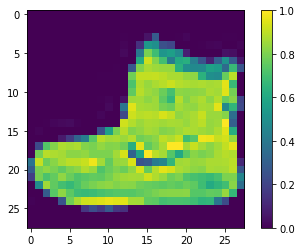

In [30]:
plt.imshow(train_images[0])
plt.colorbar()

In [31]:
train_images= train_images/255.0
test_images = test_images/255.0

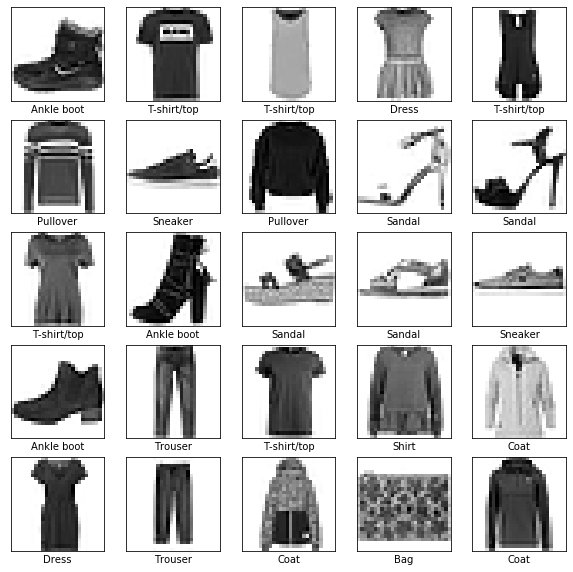

In [32]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

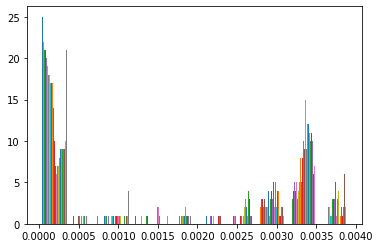

In [63]:
plt.hist(train_images[0])
plt.show()

In [64]:
#BUILD THE MODEL

In [122]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [123]:
#COMPILE THE MODEL

In [124]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [125]:
#FIT/TRAIN THE MODEL

In [126]:
Max_Epoch=15


model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.8590 - accuracy: 0.6755
Epoch 2/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.5553 - accuracy: 0.7986
Epoch 3/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.4979 - accuracy: 0.8201
Epoch 4/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.4575 - accuracy: 0.8343
Epoch 5/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.4264 - accuracy: 0.8456
Epoch 6/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.4038 - accuracy: 0.8526
Epoch 7/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3824 - accuracy: 0.8595
Epoch 8/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3674 - accuracy: 0.8640
Epoch 9/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3559 - accuracy: 0.8708
Epoch 

In [127]:
#EVALUATE

In [128]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 59us/sample - loss: 0.3860 - accuracy: 0.8607
Test accuracy: 0.8607


In [129]:
#MAKE PREDICTIONS

In [130]:
pred=model.predict(test_images)

In [131]:
np.argmax(pred[0])

9

In [132]:
#CHECK
test_labels[0]

9

In [133]:
#ANALYSE THE OUTPUT

In [134]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
   
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


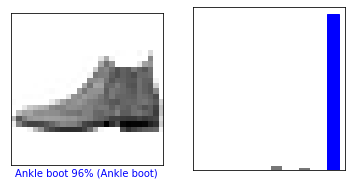

In [135]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()

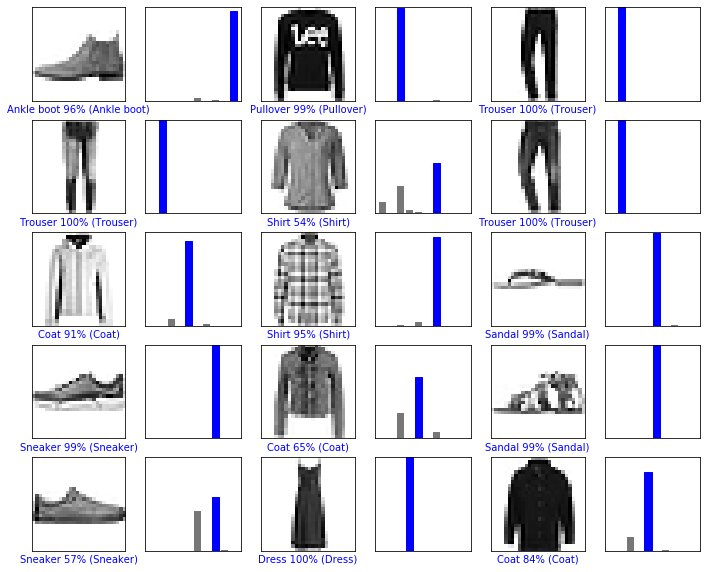

In [136]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred, test_labels)
plt.show()

In [137]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)


(28, 28)


In [138]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [139]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.1296426e-06 2.8679824e-07 1.4314144e-06 3.8032642e-06 1.4001084e-07
  2.8522650e-02 1.3642789e-05 1.3883778e-02 1.6183354e-04 9.5741034e-01]]


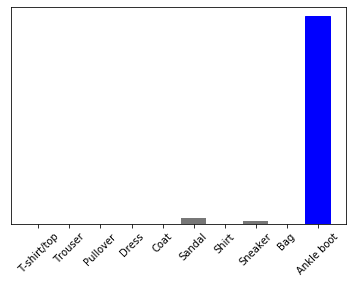

In [140]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)